In [79]:
import pandas as pd
import numpy as np

In [80]:
census = pd.read_csv('H:/IronHack/Module3/Census/acs2015_county_data.csv')


In [96]:
census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,IncomeRange
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6,Moderate
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5,Moderate
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6,Low
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3,Low
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7,Low


# Check for null values

In [82]:
census.isna().sum()

CensusId           0
State              0
County             0
TotalPop           0
Men                0
Women              0
Hispanic           0
White              0
Black              0
Native             0
Asian              0
Pacific            0
Citizen            0
Income             1
IncomeErr          1
IncomePerCap       0
IncomePerCapErr    0
Poverty            0
ChildPoverty       1
Professional       0
Service            0
Office             0
Construction       0
Production         0
Drive              0
Carpool            0
Transit            0
Walk               0
OtherTransp        0
WorkAtHome         0
MeanCommute        0
Employed           0
PrivateWork        0
PublicWork         0
SelfEmployed       0
FamilyWork         0
Unemployment       0
dtype: int64

In [84]:
census.dropna(axis = 0,inplace=True)

In [85]:
census.isna().sum()

CensusId           0
State              0
County             0
TotalPop           0
Men                0
Women              0
Hispanic           0
White              0
Black              0
Native             0
Asian              0
Pacific            0
Citizen            0
Income             0
IncomeErr          0
IncomePerCap       0
IncomePerCapErr    0
Poverty            0
ChildPoverty       0
Professional       0
Service            0
Office             0
Construction       0
Production         0
Drive              0
Carpool            0
Transit            0
Walk               0
OtherTransp        0
WorkAtHome         0
MeanCommute        0
Employed           0
PrivateWork        0
PublicWork         0
SelfEmployed       0
FamilyWork         0
Unemployment       0
dtype: int64

# Understand the Data types. 
Discrete Variables, Continuous Variables, Categorical Variables

In [86]:
census.dtypes

CensusId             int64
State               object
County              object
TotalPop             int64
Men                  int64
Women                int64
Hispanic           float64
White              float64
Black              float64
Native             float64
Asian              float64
Pacific            float64
Citizen              int64
Income             float64
IncomeErr          float64
IncomePerCap         int64
IncomePerCapErr      int64
Poverty            float64
ChildPoverty       float64
Professional       float64
Service            float64
Office             float64
Construction       float64
Production         float64
Drive              float64
Carpool            float64
Transit            float64
Walk               float64
OtherTransp        float64
WorkAtHome         float64
MeanCommute        float64
Employed             int64
PrivateWork        float64
PublicWork         float64
SelfEmployed       float64
FamilyWork         float64
Unemployment       float64
d

# Transforming a variable and changing its type 

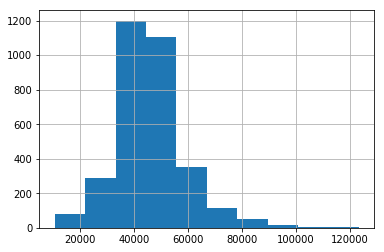

In [87]:
census.Income.hist()

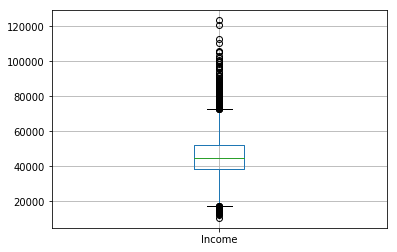

In [88]:
census.boxplot(column = 'Income')

In [89]:
census.Income.min()

10499.0

In [90]:
census['IncomeRange'] = pd.cut(census.Income, 3) 
census.IncomeRange.value_counts()

(10386.046, 48150.333]    1984
(48150.333, 85801.667]    1193
(85801.667, 123453.0]       41
Name: IncomeRange, dtype: int64

In [95]:
labels = ['Low', 'Moderate', 'High']
census['IncomeRange'] = pd.cut(census['Income'],3, labels=labels)

census['IncomeRange'].value_counts()

Low         1984
Moderate    1193
High          41
Name: IncomeRange, dtype: int64

# Variable Selection

# i) Check for correlation

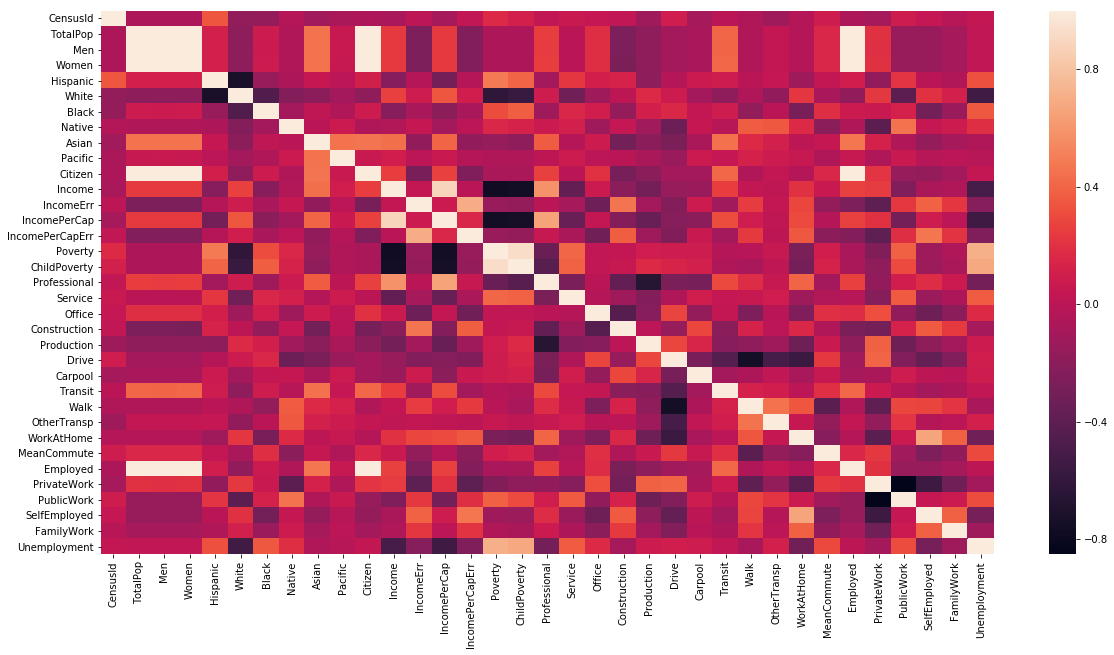

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(census.corr())

We can see that Men and Women have a correlation of 0.999527. Therefore, we should drop one of the two to avoid redundant information

In [92]:
census.corr()

,CensusId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
CensusId,1.000000,-0.061933,-0.062468,-0.061404,0.343693,-0.164625,-0.157078,-0.022415,-0.106650,-0.067761,...,-0.048119,-0.127048,-0.028415,0.087512,-0.059796,-0.089751,0.084065,0.042251,-0.015781,0.033804
TotalPop,-0.061933,1.000000,0.999877,0.999886,0.114004,-0.187826,0.075189,-0.045932,0.452655,0.059282,...,-0.047561,0.037174,-0.027611,0.148492,0.997621,0.197485,-0.143919,-0.146580,-0.085152,0.030313
Men,-0.062468,0.999877,1.000000,0.999527,0.114408,-0.186933,0.072700,-0.045711,0.453879,0.061245,...,-0.047942,0.037615,-0.027141,0.147483,0.997481,0.196590,-0.143023,-0.146294,-0.084962,0.029522
Women,-0.061404,0.999886,0.999527,1.000000,0.113588,-0.188642,0.077570,-0.046134,0.451372,0.057377,...,-0.047184,0.036740,-0.028057,0.149430,0.997524,0.198301,-0.144748,-0.146821,-0.085315,0.031068
Hispanic,0.343693,0.114004,0.114408,0.113588,1.000000,-0.725294,-0.144421,-0.056771,0.045620,0.004256,...,0.000916,0.043367,-0.122710,0.034953,0.102631,-0.171622,0.214177,-0.004862,-0.047735,0.321536
White,-0.164625,-0.187826,-0.186933,-0.188642,-0.725294,1.000000,-0.467194,-0.231239,-0.197608,-0.094548,...,-0.043060,-0.171732,0.220029,-0.078297,-0.177312,0.226419,-0.404365,0.201956,0.111525,-0.540146
Black,-0.157078,0.075189,0.072700,0.077570,-0.144421,-0.467194,1.000000,-0.096943,0.021455,-0.049270,...,-0.170050,-0.003046,-0.281822,0.186556,0.071126,0.063209,0.118376,-0.305688,-0.137749,0.352943
Native,-0.022415,-0.045932,-0.045711,-0.046134,-0.056771,-0.231239,-0.096943,1.000000,-0.001901,0.070116,...,0.368837,0.352682,0.165978,-0.208309,-0.047149,-0.404915,0.456431,0.046483,0.077586,0.187386
Asian,-0.106650,0.452655,0.453879,0.451372,0.045620,-0.197608,0.021455,-0.001901,1.000000,0.454356,...,0.168292,0.116442,0.015609,0.049482,0.467992,0.124685,-0.047503,-0.160369,-0.087144,-0.055315
Pacific,-0.067761,0.059282,0.061245,0.057377,0.004256,-0.094548,-0.049270,0.070116,0.454356,1.000000,...,0.118762,0.079009,0.053110,-0.055179,0.058691,-0.047017,0.063761,-0.012730,0.009142,-0.015888


In [93]:
census.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment', 'IncomeRange'],
      dtype='object')

# Derived Features

In [25]:
census['HighUnemploymentLowIncome'] = np.where((census.Unemployment > 0.07), 1, 0)

In [24]:
census['HighUnemploymentLowIncome'].value_counts()

1    3215
0       3
Name: HighUnemploymentLowIncome, dtype: int64

In [ ]:
census

In [126]:

X_train, X_test, y_train, y_test = train_test_split(
        census.drop(columns='Unemployment', axis=1), census.Unemployment, test_size=0.33, random_state=42)

In [127]:
X_train=X_train._get_numeric_data()
X_test=X_test._get_numeric_data()

# Basic Regression Model

In [143]:
clf = LinearRegression().fit(X_train, y_train)
y_test_pred = clf.predict(X_test)

# Evaluating the model

In [144]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

scoretest = r2_score(y_test, y_test_pred)
print('R2 for test is', scoretest)


mae = mean_absolute_error(y_test, y_test_pred)
print(f'meanabsolute for test is {mae}')

mse = mean_squared_error(y_test, y_test_pred)
print(f'meanSquareError for test is {mse}')

print(f'RootmeanSquareError for test is {np.sqrt(mse)}')


R2 for test is 0.6280854928505358
meanabsolute for test is 1.7499132894019869
meanSquareError for test is 6.070266668577575
RootmeanSquareError for test is 2.4637911170749796


In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.neighbors import KNeighborsClassifier

# Build RF classifier to use in feature selection
# clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
# clf = LogisticRegression()
clf = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(clf, 
          k_features=20, 
          forward=True, 
          floating=False,
          #verbose = 2
          scoring='neg_mean_squared_error',
          cv=10)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

#REference : http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/



In [147]:
# Which features?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 2, 5, 7, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 26, 28, 29, 30, 32]


# Backward Elimination

In [117]:
#pip install mlxtend
clf = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(clf, 
          k_features=11, 
          forward=False, 
          floating=False,
          #verbose = 2
          scoring='neg_mean_squared_error',
          cv=10)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

# Wrapper

In [148]:
clf = LinearRegression().fit(X_train.iloc[:,feat_cols], y_train)
y_test_pred = clf.predict(X_test.iloc[:,feat_cols])

(1062,)

# Evaluating our Linear Model

In [149]:
from sklearn.metrics import r2_score
scoretest = r2_score(y_test, y_test_pred)
# scoretest = r2_score(y_test, y_pred_test)

# print(f'R² for training is {scoretrain}')
# print(f'R² for testing is {scoretest}')

# print('R2 for training is', scoretrain)
print('R2 for test is', scoretest)

R2 for test is 0.6279609431497786


In [150]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_test_pred)

print(f'meanabsolute for test is {mae}')


meanabsolute for test is 1.7452338376286283


In [152]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_test_pred)

print(f'meanSquareError for test is {mse}')
print(f'meanSquareError for test is {np.sqrt(mse)}')

meanSquareError for test is 6.072299527964757
meanSquareError for test is 2.4642036295656977


In [153]:
# from sklearn.metrics import mean_squared_log_error 
# rmsle = np.sqrt(mean_squared_log_error(y_test, y_test_pred))
# print(f'rmsle for test is {rmsle}')

# Standardizing the data 

In [220]:
# Standardizing the features

#Method 1
from sklearn.preprocessing import StandardScaler
X = census._get_numeric_data()
X1 = StandardScaler().fit_transform(X)
X_scaled = pd.DataFrame(X1)
X_scaled

# Reference : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

C:\Users\Kshatriya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Kshatriya\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-1.865789,-0.138565,-0.141558,-0.135649,-0.436917,0.015217,0.688328,-0.182113,-0.085542,-0.182552,...,-0.759868,-0.186826,-0.891579,0.574999,-0.144510,-0.081324,0.519837,-0.621632,-0.633383,-0.120902
1,-1.865667,0.299519,0.296021,0.302818,-0.338162,0.333734,0.058063,-0.154533,-0.200496,-0.182552,...,-0.624686,-0.126385,-0.229682,0.557128,0.269380,0.929400,-0.812026,-0.544978,0.245447,-0.145337
2,-1.865544,-0.227149,-0.219720,-0.234253,-0.332964,-1.276304,2.663158,-0.209694,-0.315449,-0.182552,...,-0.408394,-0.065944,-0.954617,0.146099,-0.247296,-0.311616,0.504350,-0.161703,-0.413675,2.322651
3,-1.865421,-0.240702,-0.235189,-0.245956,-0.457708,-0.041505,0.891413,-0.182113,-0.430402,-0.182552,...,-0.732831,-0.065944,-1.238287,0.986028,-0.249320,0.328083,-0.223528,-0.315013,0.245447,0.050147
4,-1.865298,-0.130771,-0.130282,-0.131211,-0.125057,0.543170,-0.502173,-0.195903,-0.430402,-0.182552,...,-0.651722,-0.730796,-0.733985,2.076149,-0.156513,0.993370,-0.626184,-0.953804,0.245447,-0.096466
5,-1.865175,-0.278047,-0.276114,-0.279845,-0.343359,-2.323483,4.343865,-0.071792,-0.392085,-0.182552,...,0.456771,0.054938,-0.576390,0.753707,-0.278902,0.673521,-0.378396,-0.647184,-0.633383,2.420393
6,-1.865053,-0.247748,-0.251596,-0.243983,-0.509685,-0.966513,2.460073,-0.223484,-0.315449,-0.182552,...,-0.678758,-0.609914,-0.923098,0.235453,-0.252533,0.404847,-0.208042,-0.442771,-0.193968,0.685470
7,-1.864930,0.053788,0.046884,0.060426,-0.390138,-0.106954,0.814381,-0.209694,-0.123860,-0.182552,...,-0.570613,-0.247267,-0.607909,0.146099,0.011884,-0.017354,0.504350,-0.749391,-0.413675,1.027568
8,-1.864807,-0.204769,-0.208482,-0.201145,-0.551266,-0.791984,2.214970,-0.209694,-0.162178,-0.182552,...,-0.813940,-0.730796,-0.797023,0.324807,-0.213286,1.389983,-0.842999,-1.311527,-0.633383,0.196760
9,-1.864684,-0.230043,-0.229433,-0.230577,-0.494092,0.708973,-0.271076,-0.154533,-0.353767,-0.182552,...,-0.732831,-0.549473,-0.670947,0.735836,-0.236890,-0.145294,0.148154,-0.008393,0.465154,-0.047595


In [221]:

#Method 2
from sklearn import preprocessing
X = census._get_numeric_data()
x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_Scaled = pd.DataFrame(x_scaled)
X_scaled

#Reference : http://rasbt.github.io/mlxtend/user_guide/preprocessing/minmax_scaling/

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-1.865789,-0.138565,-0.141558,-0.135649,-0.436917,0.015217,0.688328,-0.182113,-0.085542,-0.182552,...,-0.759868,-0.186826,-0.891579,0.574999,-0.144510,-0.081324,0.519837,-0.621632,-0.633383,-0.120902
1,-1.865667,0.299519,0.296021,0.302818,-0.338162,0.333734,0.058063,-0.154533,-0.200496,-0.182552,...,-0.624686,-0.126385,-0.229682,0.557128,0.269380,0.929400,-0.812026,-0.544978,0.245447,-0.145337
2,-1.865544,-0.227149,-0.219720,-0.234253,-0.332964,-1.276304,2.663158,-0.209694,-0.315449,-0.182552,...,-0.408394,-0.065944,-0.954617,0.146099,-0.247296,-0.311616,0.504350,-0.161703,-0.413675,2.322651
3,-1.865421,-0.240702,-0.235189,-0.245956,-0.457708,-0.041505,0.891413,-0.182113,-0.430402,-0.182552,...,-0.732831,-0.065944,-1.238287,0.986028,-0.249320,0.328083,-0.223528,-0.315013,0.245447,0.050147
4,-1.865298,-0.130771,-0.130282,-0.131211,-0.125057,0.543170,-0.502173,-0.195903,-0.430402,-0.182552,...,-0.651722,-0.730796,-0.733985,2.076149,-0.156513,0.993370,-0.626184,-0.953804,0.245447,-0.096466
5,-1.865175,-0.278047,-0.276114,-0.279845,-0.343359,-2.323483,4.343865,-0.071792,-0.392085,-0.182552,...,0.456771,0.054938,-0.576390,0.753707,-0.278902,0.673521,-0.378396,-0.647184,-0.633383,2.420393
6,-1.865053,-0.247748,-0.251596,-0.243983,-0.509685,-0.966513,2.460073,-0.223484,-0.315449,-0.182552,...,-0.678758,-0.609914,-0.923098,0.235453,-0.252533,0.404847,-0.208042,-0.442771,-0.193968,0.685470
7,-1.864930,0.053788,0.046884,0.060426,-0.390138,-0.106954,0.814381,-0.209694,-0.123860,-0.182552,...,-0.570613,-0.247267,-0.607909,0.146099,0.011884,-0.017354,0.504350,-0.749391,-0.413675,1.027568
8,-1.864807,-0.204769,-0.208482,-0.201145,-0.551266,-0.791984,2.214970,-0.209694,-0.162178,-0.182552,...,-0.813940,-0.730796,-0.797023,0.324807,-0.213286,1.389983,-0.842999,-1.311527,-0.633383,0.196760
9,-1.864684,-0.230043,-0.229433,-0.230577,-0.494092,0.708973,-0.271076,-0.154533,-0.353767,-0.182552,...,-0.732831,-0.549473,-0.670947,0.735836,-0.236890,-0.145294,0.148154,-0.008393,0.465154,-0.047595


# PCA

In [211]:


from sklearn.decomposition import PCA
for_pca = census._get_numeric_data()
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(for_pca.drop(columns=['CensusId','Unemployment'], axis=1))
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10',
                         'PCA11','PCA12','PCA13','PCA14','PCA15','PCA16','PCA17','PCA18','PCA19','PCA20'])

principalDf['target'] = census['Unemployment']
principalDf.shape

(3218, 21)

In [212]:
principalDf.isna().sum() # There are two null values

PCA1      0
PCA2      0
PCA3      0
PCA4      0
PCA5      0
PCA6      0
PCA7      0
PCA8      0
PCA9      0
PCA10     0
PCA11     0
PCA12     0
PCA13     0
PCA14     0
PCA15     0
PCA16     0
PCA17     0
PCA18     0
PCA19     0
PCA20     0
target    2
dtype: int64

In [213]:
principalDf.dropna(axis = 0,inplace=True)

In [214]:
X_train, X_test, y_train, y_test = train_test_split(
        principalDf.drop(columns='target', axis=1), principalDf.target, test_size=0.33, random_state=42)

In [177]:
X_train

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6
2045,1420.885865,-1166.245563,10109.559856,2233.907396,-2404.638343,-681.794806
57,-18787.715186,-5479.576921,-1567.594932,4239.669552,-2062.177751,-1766.305763
1894,-121010.713462,6344.389215,4709.527710,-2663.852307,-840.031447,1348.673019
1859,203250.033397,-15792.777772,10267.115778,4523.608202,-3448.919663,1537.724126
2359,-98671.214761,10656.496943,15032.665585,-4443.382401,-79.153163,-36.794014
2694,-51148.452030,4904.287385,5292.504408,-853.605516,1022.698046,-582.814170
2011,-141190.390355,-2369.136967,-13401.491377,3743.437481,2740.754045,5661.560291
1745,-126381.786893,-387.895470,-8752.280154,1304.238302,976.658499,800.900093
1457,-102422.970058,5995.902605,2755.658145,-2363.372118,-880.177577,-1823.986292
1255,-109675.183708,5444.928018,5981.608554,-1073.828501,-246.573692,358.885421


In [215]:
model_pca = LinearRegression().fit(X_train, y_train)
y_test_pred = model_pca.predict(X_test)

# np.where(np.isnan(X_train))
# np.isfinite(X_train).all() #TO CHECK IF THEY ARE ALL FINITE

# X_train[np.isfinite(X_train) == True]



# Evaluating the PCA Model

In [216]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

scoretest = r2_score(y_test, y_test_pred)
print('R2 for test is', scoretest)


mae = mean_absolute_error(y_test, y_test_pred)
print(f'meanabsolute for test is {mae}')

mse = mean_squared_error(y_test, y_test_pred)
print(f'meanSquareError for test is {mse}')

print(f'RootmeanSquareError for test is {np.sqrt(mse)}')


R2 for test is 0.2762879392982376
meanabsolute for test is 2.479064840537799
meanSquareError for test is 11.794860045104794
RootmeanSquareError for test is 3.4343645766145436


In [154]:
# Build full model with selected features
logistic = LogisticRegression(random_state=0, solver='lbfgs',
                     multi_class='multinomial')
logistic.fit(X_train.iloc[:,feat_cols], y_train)


# y_train_pred = logistic.predict(X_train[:, feat_cols])
# print('Training accuracy on selected features: %.3f' % acc(y_train, y_train_pred))

y_test_pred = logistic.predict(X_test.iloc[:,feat_cols])
print('Testing accuracy on selected features: %.3f' % acc(y_test, y_test_pred))

Testing accuracy on selected features: 0.481


C:\Users\Kshatriya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


# Train, Test, Validation split

In [ ]:
X_train, X_test, y_train, y_test 
    = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val 
    = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

# CrossValidation

In [ ]:
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([1, 2, 1, 2])
cv = KFold(n_splits=3, random_state=0)

for train_index, test_index in cv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)